<a href="https://colab.research.google.com/github/Imashish-45/Object_detection_YOLO/blob/main/Object_detect_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECT DETECTION THROUGH COMPUTER VISION ALGORITHMS LIKE YOLO-NAS:



**Object Detection using YOLO-NAS**

YOLO-NAS (You Only Look Once Neural Architecture Search) is an advanced version of the YOLO (You Only Look Once) object detection framework. It combines the efficiency and accuracy of YOLO with neural architecture search, which automatically discovers the optimal neural network architecture for object detection tasks.

**Key Features of YOLO-NAS:**
- **Efficiency:** YOLO-NAS is designed to be fast and efficient, making it suitable for real-time object detection applications.
- **Accuracy:** With the help of neural architecture search, YOLO-NAS achieves improved detection accuracy compared to traditional YOLO versions.
- **Automatic Architecture Search:** YOLO-NAS automates the process of discovering the best neural network architecture for object detection tasks, eliminating the need for manual architecture design.





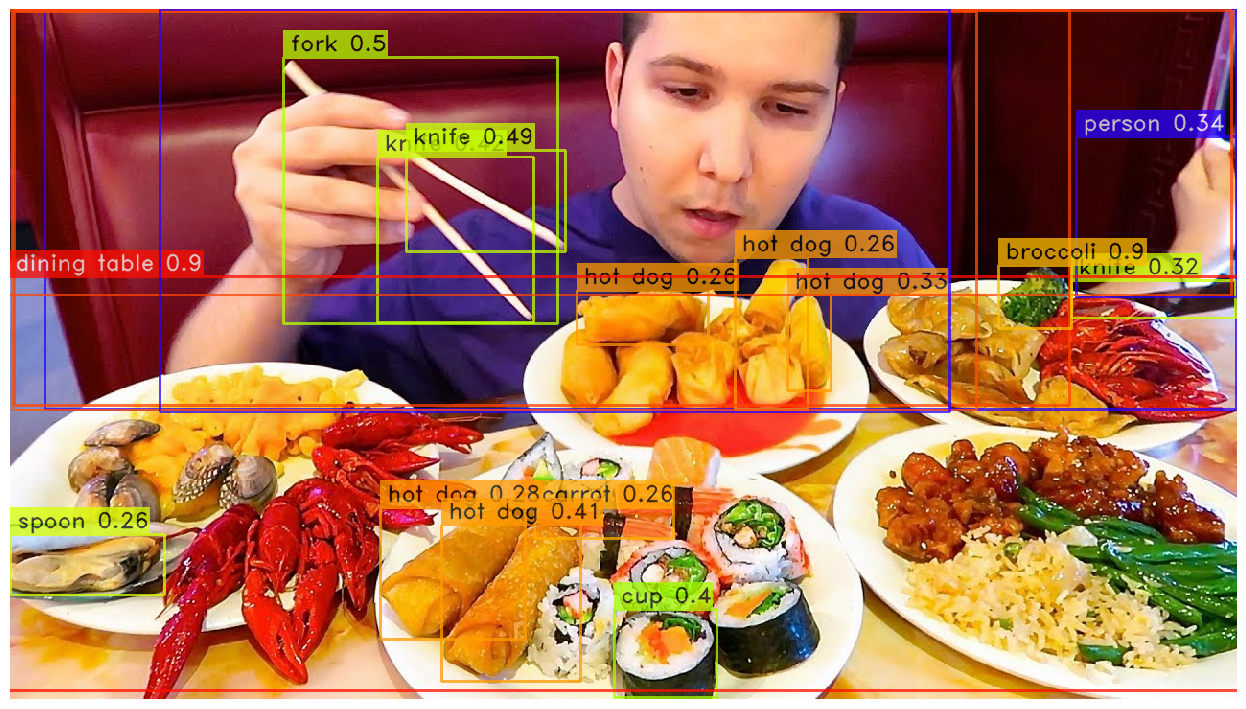

In [1]:
!pip install super-gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 56.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... do

In [1]:
!pip install imutils

!pip install pytube --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00


In [2]:
import torch
torch.__version__

'2.0.1+cu118'

In [3]:
import torch
torch.cuda.get_device_name(0)

'Tesla T4'

In [4]:
from super_gradients.training import models

The console stream is logged into /root/sg_logs/console.log


[2023-08-03 09:15:36] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-08-03 09:15:41] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-08-03 09:15:44] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-03 09:15:44] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-03 09:15:44] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-03 09:15:44] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [5]:

yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")


[2023-08-03 09:16:13] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:05<00:00, 49.2MB/s]


**Architecture of the pre-trained model :**

In [6]:
!pip install torchinfo

from torchinfo import summary

summary(model=yolo_nas_l,
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

# Detection through Yolo nas large model:

Image detection:

[2023-08-03 09:19:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


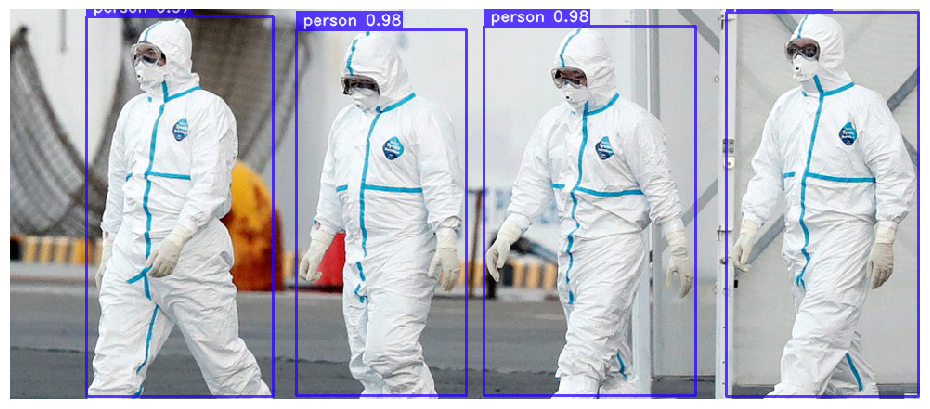

In [8]:
url = "/content/ppe-kits.jpg"
yolo_nas_l.predict(url, conf=0.25).show()

[2023-08-03 09:20:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


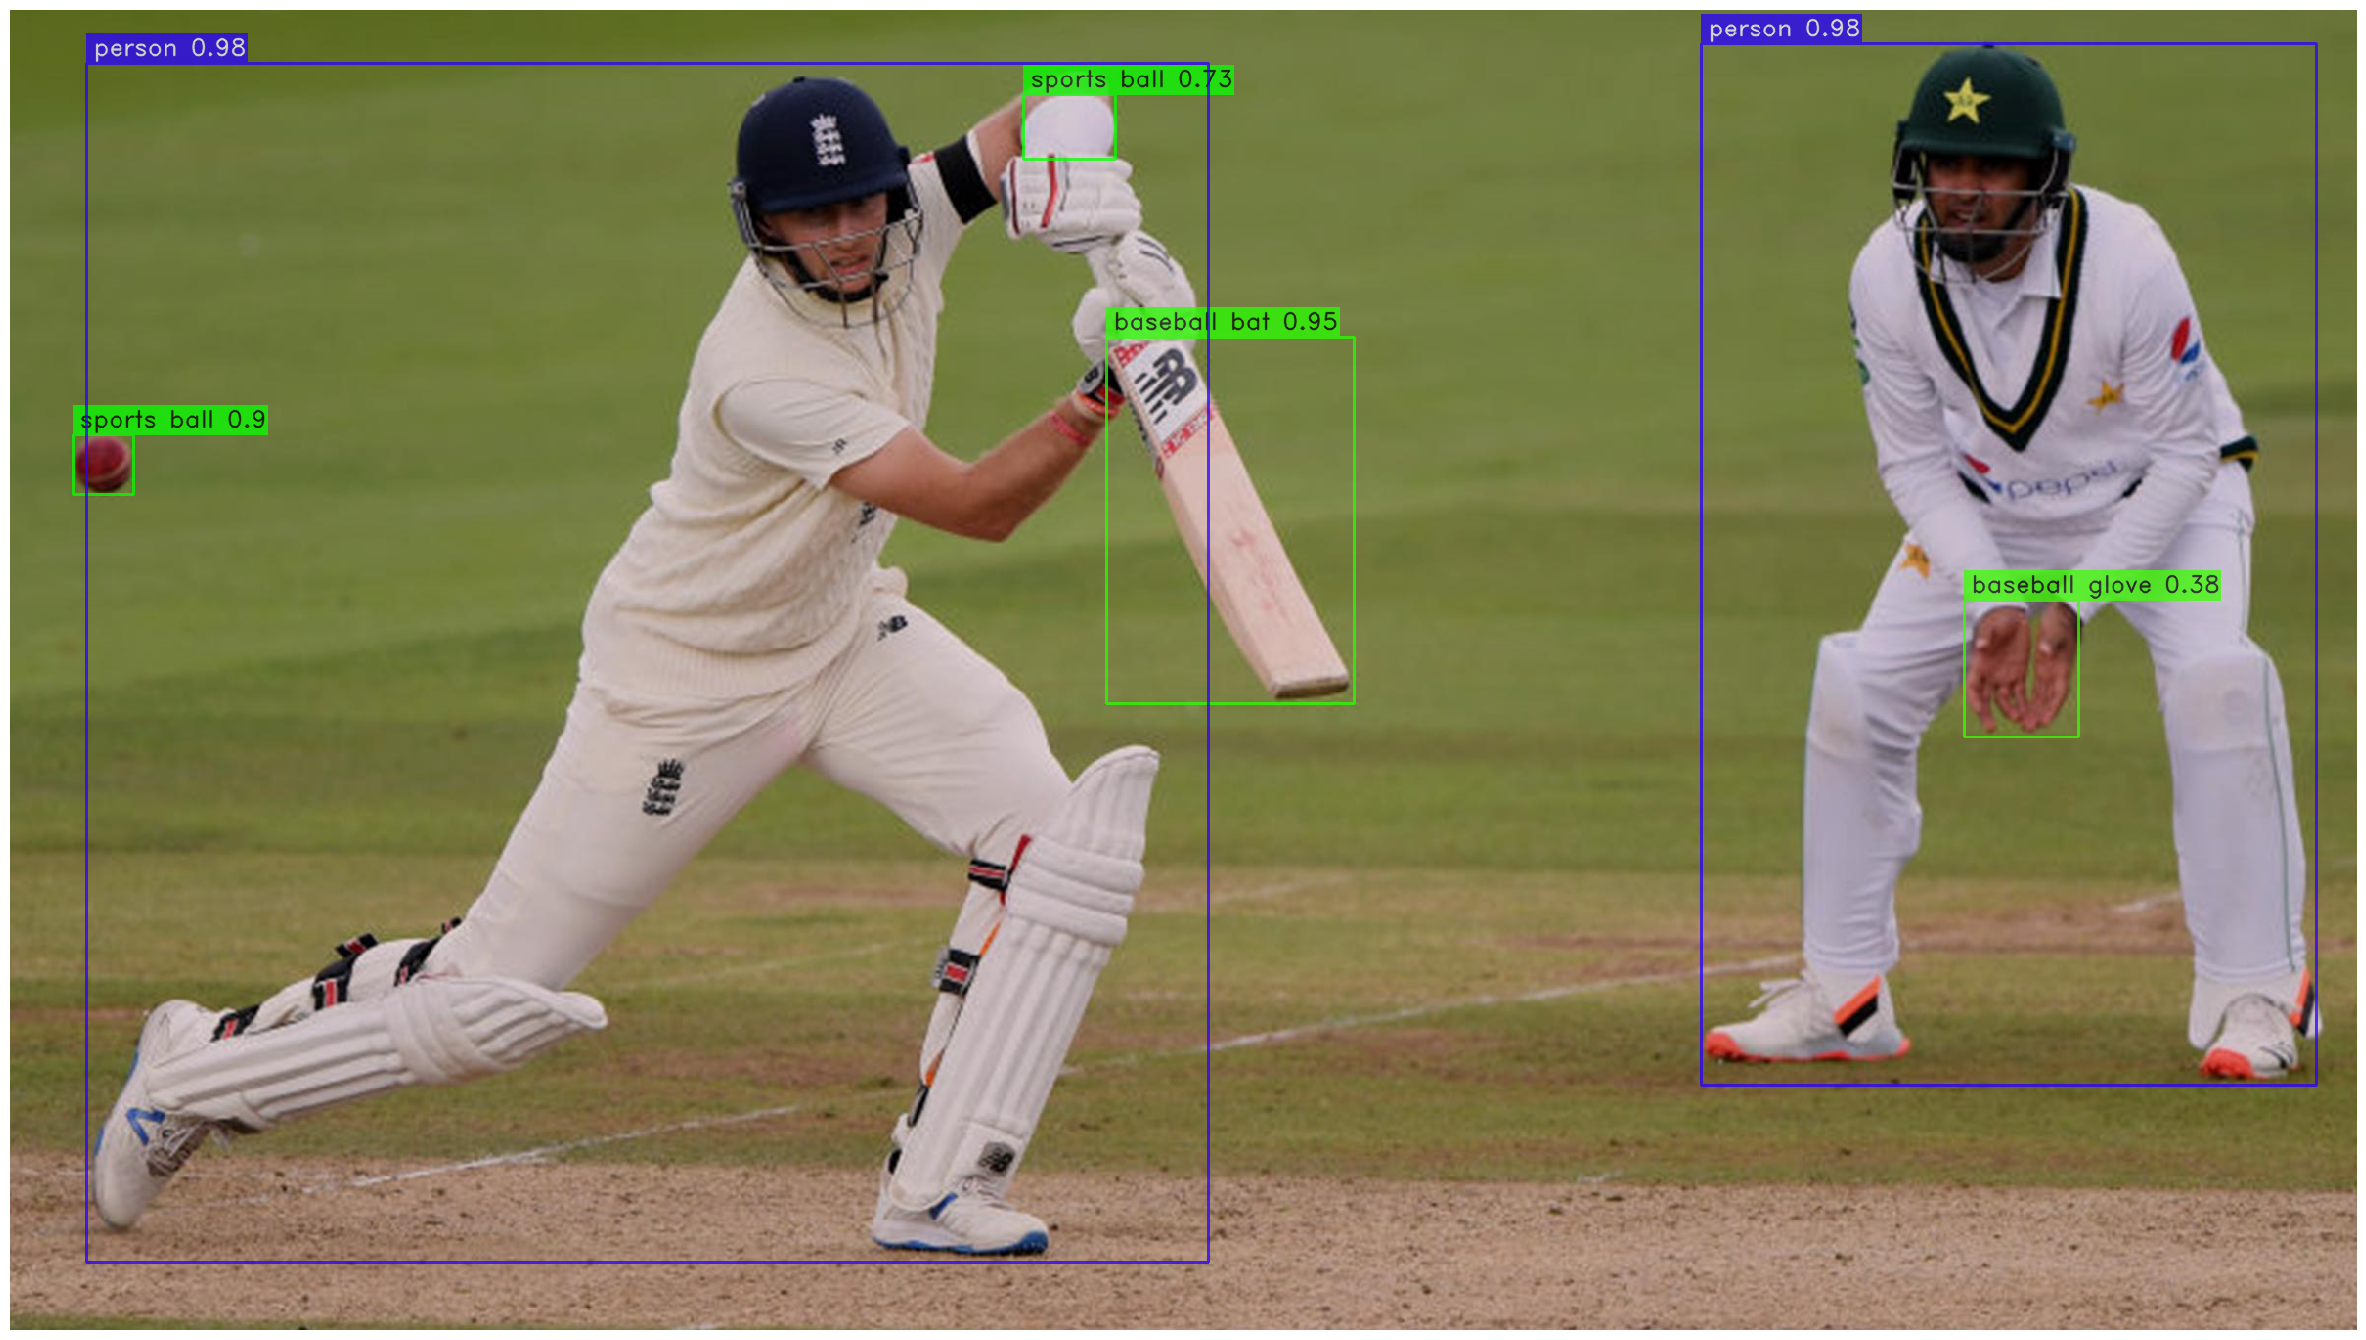

In [9]:
url = "/content/cricket.jpg"
yolo_nas_l.predict(url, conf=0.25).show()

Object detection in videos:

In [11]:
input_video_path = "/content/mixkit-children-playing-with-a-dancing-fountain-3469-medium.mp4"
output_video_path = "detections.mp4"
device=0

yolo_nas_l.to(device).predict(input_video_path).save(output_video_path)


Predicting Video: 100%|██████████| 295/295 [00:07<00:00, 41.59it/s]


In [13]:
# Displaying the video after object detection

from IPython.display import Video

video_url = '/content/detections.mp4'  # actual URL of the video
Video(video_url)
